# Assumption


*   As $N \rightarrow \infty$, $P_{real} \rightarrow P_{theoretical}$
*   Mean Reversion



# Configuration

In [1]:
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np

In [2]:
class point:
    def __init__(self,number = None):
        self.number = number
        self.color = None
        self.parity = None
        
    
    def num2color(self,number):
        if number == None:
            return None
        if 1<=number<=10 or 19<=number<=28:
            color = 'Red' if number % 2 == 1 else 'Black'
        elif 11<=number<=18 or 29<=number<=36:
            color = 'Red' if number % 2 == 0 else 'Black'
        else:
            color = "Green"
        return color
    
    def num2parity(self,number):
        if number == None:
            parity = None
        elif number == 0:
            parity = 'Zero'
        elif number % 2 == 0:
            parity = 'Even'
        elif number % 2 == 1:
            parity = 'Odd'
            
        return parity
    
    def Initialization(self):
        self.color = self.num2color(self.number)
        self.parity = self.num2parity(self.number)

# Data Generating

In [5]:
point_ls = []
N = int(1e6)
for i in range(N):
    point_tmp=point(random.randint(0,36))
    point_tmp.Initialization()
    point_ls.append(point_tmp)

# EDA

## Color Distribution

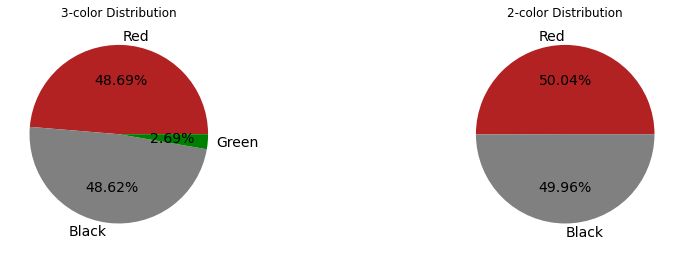

In [6]:
def Color_Distribution(point_ls,start = 0,end = len(point_ls)):
  red_count = black_count = green_count = 0
  for point in point_ls[start:end]:
    if point.color == 'Red':
      red_count+=1
    elif point.color == 'Black':
      black_count+=1
    elif point.color == 'Green':
      green_count +=1

  # Initialise the subplot function using number of rows and columns
  figure, axis = plt.subplots(1,2,figsize=(12,12))
  plt.subplots_adjust(wspace = 1, hspace =0)
  axis[0].pie(np.array([red_count,black_count,green_count]),labels=['Red','Black','Green'],colors = ['firebrick','gray','g'],autopct='%.2f%%', textprops={'fontsize': 14})
  axis[0].set_title("3-color Distribution")
  axis[1].pie(np.array([red_count,black_count]),labels=['Red','Black'],colors = ['firebrick','gray'],autopct='%.2f%%', textprops={'fontsize': 14})
  axis[1].set_title("2-color Distribution")
  plt.show()
  return {'Red_Count': red_count,'Black_Count':black_count,'Green_Count':green_count}

color_count = Color_Distribution(point_ls)

## Color Pattern Detection

In [ ]:
def color_pattern_detection(point_ls = [], consecutive_same_colors = 5, num_different = 20):
    pattern_ls = [] # stores patterns 
    '''
    Each pattern starts with one color, then repeat this color for "consecutive_same_colors" times, 
    whenever the next color changes, store the next "num_different" points.
    Eg. RRBRBBBBBBBBRBRRRBRBRBRRBRRB should save BBBBBBBBRBRRRB (BBBBB + BBB + RBRBRBRBRB)
    '''

    index = 0
    while index < len(point_ls)- consecutive_same_colors - num_different-3:
      point_ls_tmp = []
      while True:
        point_ls_tmp.append(point_ls[index])
        index+=1
        if point_ls[index-1].color != point_ls[index].color:
          break
          
      if len(point_ls_tmp) >= consecutive_same_colors:
        for i in range(num_different):
          point_ls_tmp.append(point_ls[index+i])
        pattern_ls.append(point_ls_tmp)  

    return pattern_ls

In [ ]:
ls = color_pattern_detection(point_ls,num_different=6)
len(ls)

839762

In [ ]:
# def color_pattern_detection_fxw(point_ls = [], consecutive_same_colors=5, num_different = 6):
#     pattern_ls = [] # stores patterns 
#     l = 0
    
#     while l < len(color_ls):
#         color_ls = []
#         window = point_ls[l:l+consecutive_same_colors]
#         for i in window:
#             color_ls.append(i.color)
            
#         if len(set(color_ls)) == 1:
#             i = 0
#             while point_ls[l+consecutive_same_colors+i].color == color_ls[0]:
#                 color_ls.append(point_ls[l+consecutive_same_colors+i].color)
#                 i += 1
                
#             n = 0
#             additional_numbers = num_different
#             while additional_numbers:
#                 color_ls.append(point_ls[l+len(color_ls)+n].color)
#                 n += 1
#                 additional_numbers -= 1
                
#             l = l + consecutive_same_colors + i
            
#         else:
#             l += 1
#             color_ls = []

#         if len(color_ls) != 0:
#             pattern_ls.append(color_ls)
 
#     return pattern_ls

## Data exploration

In [ ]:
def consec_table(point_ls=[], consecutive_same_colors=5, show_next = 6):
  consec_list = []

  index = 0

  while index < len(point_ls) - consecutive_same_colors - show_next - 3:
    color_ls_tmp = []
    while True:
      color_ls_tmp.append(point_ls[index].color)
      index+=1
      if point_ls[index-1].color != point_ls[index].color:
        break
        
    if len(color_ls_tmp) >= consecutive_same_colors:
      color_ls_tmp = color_ls_tmp[consecutive_same_colors-1:]
      if len(color_ls_tmp)-1 >show_next:
        color_ls_tmp = color_ls_tmp[:show_next]
      else:
        for i in range(show_next-len(color_ls_tmp)+1):
          color_ls_tmp.append(point_ls[index+i].color)
      consec_list.append(color_ls_tmp)

  column_names = list(range(show_next+1))
  df = pd.DataFrame(consec_list, columns=column_names)
  return df

Consecutive_same_colors: 6
There are 408787 desired patterns


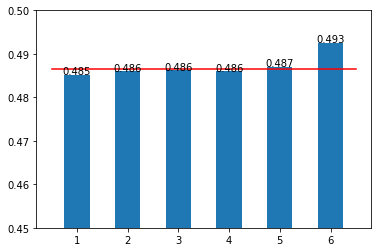

---------------------------------------------------------------------
---------------------------------------------------------------------
Consecutive_same_colors: 7
There are 199356 desired patterns


<Figure size 432x288 with 0 Axes>

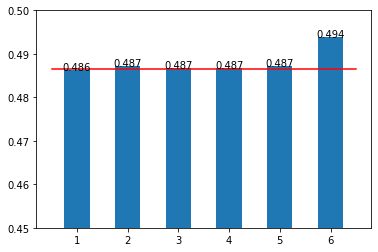

---------------------------------------------------------------------
---------------------------------------------------------------------
Consecutive_same_colors: 8
There are 96902 desired patterns


<Figure size 432x288 with 0 Axes>

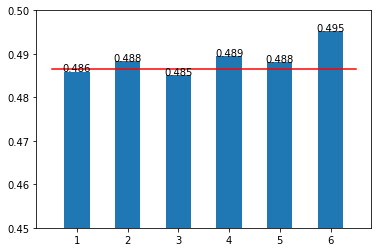

---------------------------------------------------------------------
---------------------------------------------------------------------
Consecutive_same_colors: 9
There are 47311 desired patterns


<Figure size 432x288 with 0 Axes>

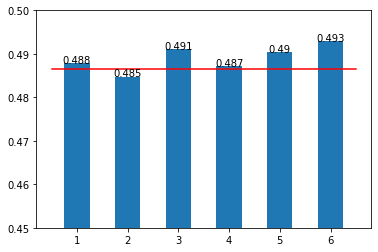

---------------------------------------------------------------------
---------------------------------------------------------------------
Consecutive_same_colors: 10
There are 22940 desired patterns


<Figure size 432x288 with 0 Axes>

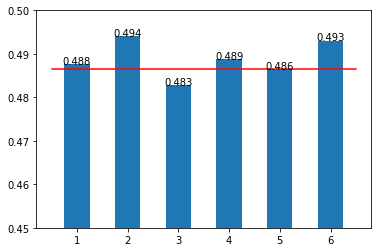

---------------------------------------------------------------------
---------------------------------------------------------------------
Consecutive_same_colors: 11
There are 11142 desired patterns


<Figure size 432x288 with 0 Axes>

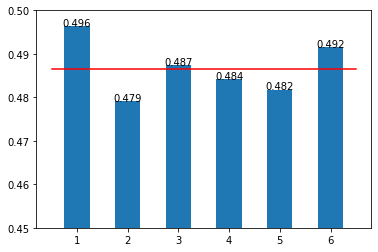

---------------------------------------------------------------------
---------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [ ]:
# For each {consecutive_same_colors}, display percentage of the other color in vertical axis
import matplotlib.lines as lines
for consecutive_same_colors in range(6,12):
  print(f"Consecutive_same_colors: {consecutive_same_colors}")
  table = consec_table(point_ls, consecutive_same_colors=consecutive_same_colors, show_next = 6)
  print(f"There are {len(table)} desired patterns")
  # display(table.head())

  # Convert Opposite color into 1 and same color into 0
  table_tmp = table.copy()
  for col in table_tmp.columns.values[1:]:
    table_tmp[col] = ((table_tmp[0]!=table_tmp[col])&(table_tmp[col]!='Green'))*1
  # display(table_tmp.head())

  fig = plt.figure()
  x = table_tmp.describe().loc['mean'].index
  y = table_tmp.describe().loc['mean'].values
  plt.bar(x,y,width=0.5)
  plt.ylim(0.45,0.5)
  # Add auxiliary line
  for index,data in enumerate(y):
      plt.text(index+1, data, str(round(data,3)),ha="center")
  plt.plot([0.5,6.5], [(color_count['Black_Count']+color_count['Red_Count'])/N/2,(color_count['Black_Count']+color_count['Red_Count'])/N/2], 'red')
  plt.show()
  plt.savefig(f"{consecutive_same_colors}_.png")
  print("---------------------------------------------------------------------")
  print("---------------------------------------------------------------------")

# Betting Strategy

In [ ]:
def betting_strategy(pattern_ls = [], consecutive_same_colors=5, spliting_number = 10, stop_betting= 3,stop_loss = 6):
    capital = 1 # divide capital into "spliting_number" parts, every time bet "capital/spliting_number"
    number_wins = 0
    number_loses = 0
    
    for pattern in pattern_ls:
      pattern_for_investment = pattern[consecutive_same_colors:]
      number_wins_tmp = number_loses_tmp = 0
      for index in range(stop_loss):
        if number_wins_tmp >= 3:
          break
        else:
          if pattern_for_investment[index].color == pattern[0].color:
            capital += capital/spliting_number
            number_wins_tmp +=1
          else:
            capital -= capital/spliting_number
            number_loses_tmp +=1
      number_wins += number_wins_tmp     
      number_loses += number_loses_tmp

    # Metrics:
    number_bets = number_wins + number_loses
    winning_rate = number_wins/number_bets
    return_each_bet = (capital - 1)/number_bets
    # To do: largest consecutive loss in terms of "number_loses"
    return [winning_rate,return_each_bet]

In [ ]:
# May consider using ratios instead of absolute numbers for further update

# To do: Study multiprocessing and threading to solve these issues (try to run fast for a large number)
# find the best strategy
max_return_each_bet = max_winning_rate = 0
result = pd.DataFrame(columns = ['consecutive_same_colors','spliting_number','stop_betting','stop_loss','wining_rate','return_each_bet'])
for consecutive_same_colors in range(5,9):
  for spliting_number in range (5,15):
    for stop_betting in range(1,5):
      for stop_loss in range(3,spliting_number):
        pattern_ls = color_pattern_detection(point_ls=point_ls, consecutive_same_colors=consecutive_same_colors)
        [wining_rate,return_each_bet] = betting_strategy(pattern_ls=pattern_ls, consecutive_same_colors=consecutive_same_colors, spliting_number = spliting_number, stop_betting= stop_betting,stop_loss = stop_loss)
        new_row = {'consecutive_same_colors':consecutive_same_colors, 'spliting_number':spliting_number, 'stop_betting':stop_betting, 'stop_loss':stop_loss,'wining_rate':wining_rate, 'return_each_bet': return_each_bet}
        result=result.append(new_row,ignore_index=True) 

In [ ]:
result

In [ ]:
result.sort_values(by=['wining_rate','return_each_bet'],ascending=False)

In [ ]:
result.sort_values(by=['return_each_bet','wining_rate'],ascending=False)